In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import defaultdict

%matplotlib inline

In [3]:

well = pd.read_csv('C:\\Users\\c-292.CSV' , header=0)

print(well)

       DEPTH   SP   GR   CALI    RHOB    DT  NPHI   MSFL    ILD
0     8200.0    3   53   12.1    2.21   114  0.45    0.6    0.6
1     8200.5    4   54   12.1    2.22   114  0.44    0.7    0.5
2     8201.0    5   54   12.1    2.21   115  0.42    0.7    0.5
3     8201.5    5   54   12.0    2.21   115  0.41    0.6    0.5
4     8202.0    5   53   12.0    2.21   114  0.41    0.7    0.5
...      ...  ...  ...    ...     ...   ...   ...    ...    ...
2216 -9308.0 -999 -999 -999.0 -999.00 -1998  0.00 -999.0 -999.0
2217 -9308.5 -999 -999 -999.0 -999.00 -1998  0.00 -999.0 -999.0
2218 -9309.0 -999 -999 -999.0 -999.00 -1998  0.00 -999.0 -999.0
2219 -9309.5 -999 -999 -999.0 -999.00 -1998  0.00 -999.0 -999.0
2220 -9310.0 -999 -999 -999.0 -999.00 -1998  0.00 -999.0 -999.0

[2221 rows x 9 columns]


In [4]:
headerName = ['DEPTH','SP','GR','CALI','RHOB','DT','HPHI','MSFL','ILD']

well.columes = [headerName]

well

C:\Users\essa\AppData\Local\Temp\ipykernel_1740\78052168.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  well.columes = [headerName]


,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD
0,8200.0,3,53,12.1,2.21,114,0.45,0.6,0.6
1,8200.5,4,54,12.1,2.22,114,0.44,0.7,0.5
2,8201.0,5,54,12.1,2.21,115,0.42,0.7,0.5
3,8201.5,5,54,12.0,2.21,115,0.41,0.6,0.5
4,8202.0,5,53,12.0,2.21,114,0.41,0.7,0.5
...,...,...,...,...,...,...,...,...,...
2216,-9308.0,-999,-999,-999.0,-999.00,-1998,0.00,-999.0,-999.0
2217,-9308.5,-999,-999,-999.0,-999.00,-1998,0.00,-999.0,-999.0
2218,-9309.0,-999,-999,-999.0,-999.00,-1998,0.00,-999.0,-999.0
2219,-9309.5,-999,-999,-999.0,-999.00,-1998,0.00,-999.0,-999.0


In [5]:
well.head()


,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD
0,8200.0,3,53,12.1,2.21,114,0.45,0.6,0.6
1,8200.5,4,54,12.1,2.22,114,0.44,0.7,0.5
2,8201.0,5,54,12.1,2.21,115,0.42,0.7,0.5
3,8201.5,5,54,12.0,2.21,115,0.41,0.6,0.5
4,8202.0,5,53,12.0,2.21,114,0.41,0.7,0.5


In [6]:
well.replace(-999, np.nan, inplace=True)


In [7]:

tops = ('Zone-1','zone-2','zone-3', 'zone-4','zone-5','zone-6','zone-7', 'zone-8')
tops_depths=(8200,8228,8312.5,8491.5,8642.5, 8700,8857,9220.5)


In [8]:
top_depth= 8200
bottom_depth=9310

In [9]:
# Create the figure and subplots
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=well[(well.DEPTH >= top_depth) & (well.DEPTH <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,12), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')


#1st track: GR, CALI, SP track
    
    ax01=ax[0].twiny()
    ax01.set_xlim(-100,100)
    ax01.spines['top'].set_position(('outward',0))
    ax01.set_xlabel("SP [mV]")
    ax01.plot(logs.SP, logs.DEPTH, label='SP[mV]', color='blue', linewidth = 0.5)
    ax01.set_xlabel('SP[mV]',color='blue')    
    ax01.tick_params(axis='x', colors='blue')
    ax01.grid(True)
    
    ax02=ax[0].twiny()
    ax02.set_xlim(6,16)
    ax02.plot(logs.CALI, logs.DEPTH, '--', label='CALN[in]', color='black' , linewidth = 0.5) 
    ax02.spines['top'].set_position(('outward',40))
    ax02.set_xlabel('CALI[in]',color='black')    
    ax02.tick_params(axis='x', colors='black')
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.DEPTH, label='GR[api]', color='green' , linewidth = 0.5) 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')
    
#2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.2,200)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[m.ohm]', color='red')
    ax11.plot(logs.ILD, logs.DEPTH, label='ILD[m.ohm]', color='red' ,linewidth = 0.5)
    ax11.tick_params(axis='x', colors='red')    
    
    ax12=ax[1].twiny()
    ax12.set_xlim(0.2,200)
    ax12.set_xscale('log')
    ax12.plot(logs.MSFL, logs.DEPTH, label='MSFL[m.ohm]', color='purple' ,linewidth = 0.5) 
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel('MSFL[m.ohm]', color='purple')    
    ax12.tick_params(axis='x', colors='purple')
    
#3rd track: DT, RHOB, NPHI track
    ax21=ax[2].twiny()
    ax21.set_xlim(-0.15,0.45)
    ax21.invert_xaxis()
    ax21.plot(logs.NPHI, logs.DEPTH, label='NPHI[%]', color='green', linewidth = 0.5) 
    ax21.spines['top'].set_position(('outward',40))
    ax21.set_xlabel('NPHI[%]', color='green')    
    ax21.tick_params(axis='x', colors='green')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(1.95,2.95)
    ax22.plot(logs.RHOB, logs.DEPTH ,label='RHOB[g/cc]', color='red' ,linewidth = 0.5) 
    ax22.spines['top'].set_position(('outward',80))
    ax22.set_xlabel('RHOB[g/cc]',color='red')
    ax22.tick_params(axis='x', colors='red')
    
    ax23=ax[2].twiny()
    ax23.grid(True)
    ax23.set_xlim(140,40)
    ax23.spines['top'].set_position(('outward',0))
    ax23.set_xlabel('DT[us/ft]',color='blue')
    ax23.plot(logs.DT,logs.DEPTH,label='DT[us/ft]',color='blue' ,linewidth = 0.5)
    ax23.tick_params(axis='x',colors='blue')
    

  
    
    #plt.savefig ('triple_combo_plot.png', dpi=200, format='png')

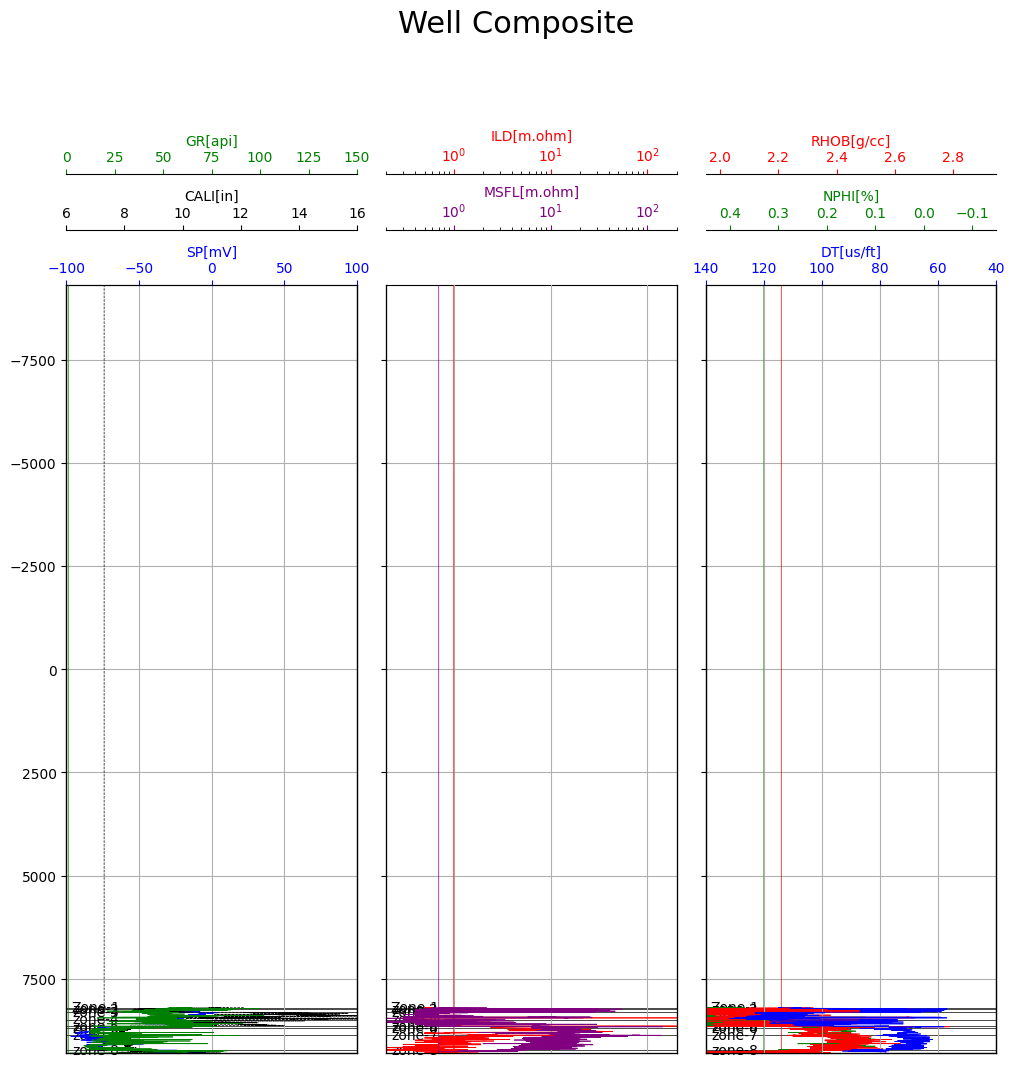

In [10]:
#%matplotlib nbagg

triple_combo_plot(well.DEPTH.min(),well.DEPTH.max())

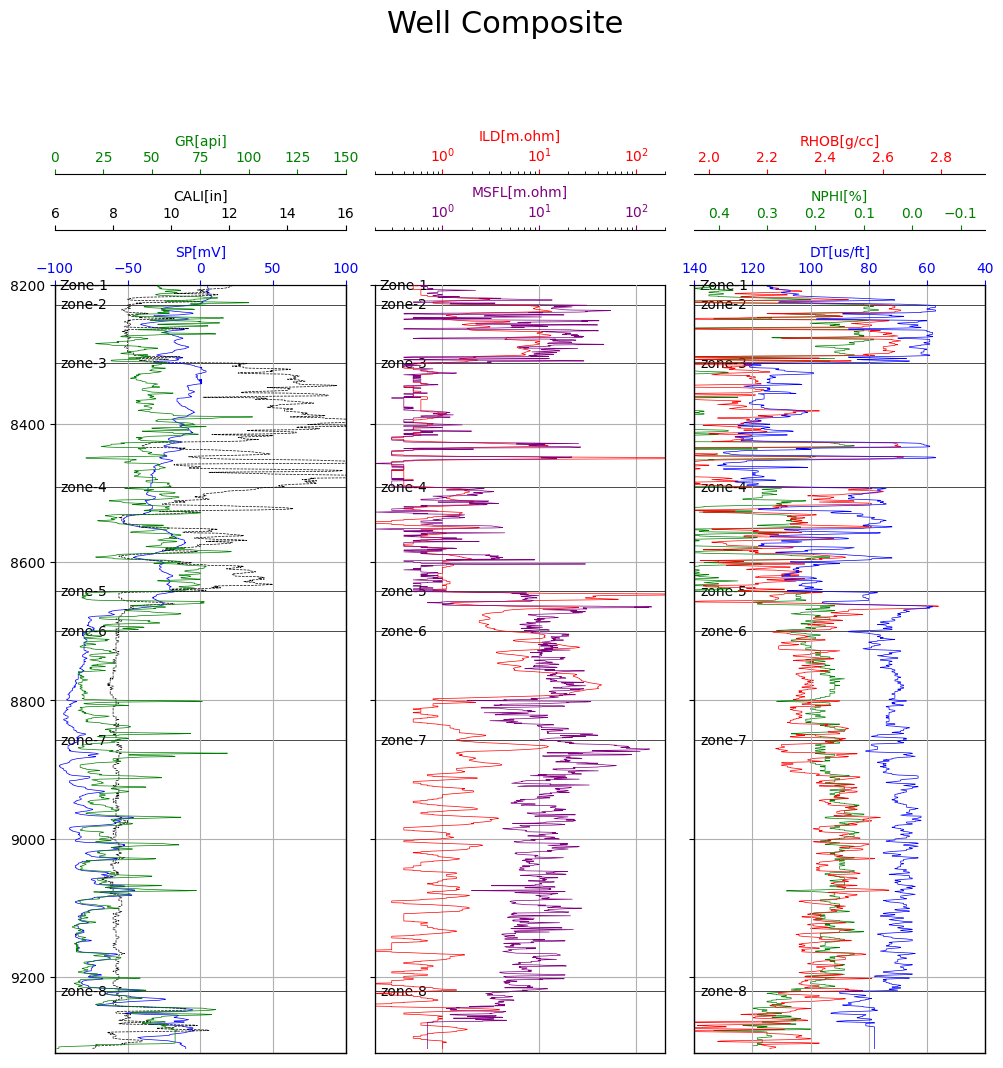

In [11]:
top_depth= 8200
bottom_depth=9310

triple_combo_plot(top_depth,bottom_depth)

In [12]:
plt.savefig ('triple_combo_plot.png', dpi=100, format='png')

<Figure size 640x480 with 0 Axes>

In [13]:
GRmin = well.GR.min()
GRmax = well.GR.max()
VSH = (well.GR - GRmin) / (GRmax - GRmin)

In [14]:
VSH = np.array(VSH)
well['VSH'] = VSH
well

,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD,VSH
0,8200.0,3.0,53.0,12.1,2.21,114.0,0.45,0.6,0.6,0.514851
1,8200.5,4.0,54.0,12.1,2.22,114.0,0.44,0.7,0.5,0.524752
2,8201.0,5.0,54.0,12.1,2.21,115.0,0.42,0.7,0.5,0.524752
3,8201.5,5.0,54.0,12.0,2.21,115.0,0.41,0.6,0.5,0.524752
4,8202.0,5.0,53.0,12.0,2.21,114.0,0.41,0.7,0.5,0.514851
...,...,...,...,...,...,...,...,...,...,...
2216,-9308.0,NaN,NaN,NaN,NaN,-1998.0,0.00,NaN,NaN,NaN
2217,-9308.5,NaN,NaN,NaN,NaN,-1998.0,0.00,NaN,NaN,NaN
2218,-9309.0,NaN,NaN,NaN,NaN,-1998.0,0.00,NaN,NaN,NaN
2219,-9309.5,NaN,NaN,NaN,NaN,-1998.0,0.00,NaN,NaN,NaN


In [15]:
def Porosity_Density (den, den_grain, den_fluid):
    Porosity_Density = (den_grain - den)/(den_grain - den_fluid)
    return Porosity_Density

In [16]:
den_grain, den_fluid = 2.65, 1

In [17]:
well['Porosity_Density'] = Porosity_Density (well.RHOB, den_grain, den_fluid)
well['Porosity_Density'][well['Porosity_Density'] < 0] = 0
well.head()

,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD,VSH,Porosity_Density
0,8200.0,3.0,53.0,12.1,2.21,114.0,0.45,0.6,0.6,0.514851,0.266667
1,8200.5,4.0,54.0,12.1,2.22,114.0,0.44,0.7,0.5,0.524752,0.260606
2,8201.0,5.0,54.0,12.1,2.21,115.0,0.42,0.7,0.5,0.524752,0.266667
3,8201.5,5.0,54.0,12.0,2.21,115.0,0.41,0.6,0.5,0.524752,0.266667
4,8202.0,5.0,53.0,12.0,2.21,114.0,0.41,0.7,0.5,0.514851,0.266667


In [18]:
GR_min = 12
GR_max = 77

In [19]:
well['Vshale'] = ((well.GR - GR_min) / (GR_max - GR_min))
well['Vshale'][well['Vshale'] < 0] = 0
well.head()

,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD,VSH,Porosity_Density,Vshale
0,8200.0,3.0,53.0,12.1,2.21,114.0,0.45,0.6,0.6,0.514851,0.266667,0.630769
1,8200.5,4.0,54.0,12.1,2.22,114.0,0.44,0.7,0.5,0.524752,0.260606,0.646154
2,8201.0,5.0,54.0,12.1,2.21,115.0,0.42,0.7,0.5,0.524752,0.266667,0.646154
3,8201.5,5.0,54.0,12.0,2.21,115.0,0.41,0.6,0.5,0.524752,0.266667,0.646154
4,8202.0,5.0,53.0,12.0,2.21,114.0,0.41,0.7,0.5,0.514851,0.266667,0.630769


In [20]:
def Porosity_Gaymard (Poro_RHOB, NPHI):
    Porosity_Gaymard = ((Poro_RHOB**2 + NPHI**2)/2)**(1/2)
    return Porosity_Gaymard

In [21]:
well['Porosity_Gaymard'] = Porosity_Gaymard (well.Porosity_Density, well.NPHI)
well['Porosity_Gaymard'][well['Porosity_Gaymard'] < 0] = 0
well.head()

,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD,VSH,Porosity_Density,Vshale,Porosity_Gaymard
0,8200.0,3.0,53.0,12.1,2.21,114.0,0.45,0.6,0.6,0.514851,0.266667,0.630769,0.369872
1,8200.5,4.0,54.0,12.1,2.22,114.0,0.44,0.7,0.5,0.524752,0.260606,0.646154,0.361604
2,8201.0,5.0,54.0,12.1,2.21,115.0,0.42,0.7,0.5,0.524752,0.266667,0.646154,0.351789
3,8201.5,5.0,54.0,12.0,2.21,115.0,0.41,0.6,0.5,0.524752,0.266667,0.646154,0.345840
4,8202.0,5.0,53.0,12.0,2.21,114.0,0.41,0.7,0.5,0.514851,0.266667,0.630769,0.345840


In [22]:
well['Effective_Porosity'] = well['Porosity_Gaymard'] * (1 - well['Vshale'])
well.head()

,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD,VSH,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity
0,8200.0,3.0,53.0,12.1,2.21,114.0,0.45,0.6,0.6,0.514851,0.266667,0.630769,0.369872,0.136568
1,8200.5,4.0,54.0,12.1,2.22,114.0,0.44,0.7,0.5,0.524752,0.260606,0.646154,0.361604,0.127952
2,8201.0,5.0,54.0,12.1,2.21,115.0,0.42,0.7,0.5,0.524752,0.266667,0.646154,0.351789,0.124479
3,8201.5,5.0,54.0,12.0,2.21,115.0,0.41,0.6,0.5,0.524752,0.266667,0.646154,0.345840,0.122374
4,8202.0,5.0,53.0,12.0,2.21,114.0,0.41,0.7,0.5,0.514851,0.266667,0.630769,0.345840,0.127695


In [23]:
def Formation_Factor (a, Porosity, m):
    Formation_Factor = a*(Porosity)**(-m)
    return Formation_Factor

In [24]:
a, m = 1, 2

In [25]:
well['Formation_Factor'] = Formation_Factor(a, well.Effective_Porosity, m)
well.head()

,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD,VSH,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor
0,8200.0,3.0,53.0,12.1,2.21,114.0,0.45,0.6,0.6,0.514851,0.266667,0.630769,0.369872,0.136568,53.616751
1,8200.5,4.0,54.0,12.1,2.22,114.0,0.44,0.7,0.5,0.524752,0.260606,0.646154,0.361604,0.127952,61.080639
2,8201.0,5.0,54.0,12.1,2.21,115.0,0.42,0.7,0.5,0.524752,0.266667,0.646154,0.351789,0.124479,64.536638
3,8201.5,5.0,54.0,12.0,2.21,115.0,0.41,0.6,0.5,0.524752,0.266667,0.646154,0.345840,0.122374,66.775891
4,8202.0,5.0,53.0,12.0,2.21,114.0,0.41,0.7,0.5,0.514851,0.266667,0.630769,0.345840,0.127695,61.327163


In [26]:
def Ashale (Rsh, Rt, Vlam):
    Ashale = ((Rsh - Rt*Vlam)*(1-Vlam))/Rsh
    Ashale[Ashale > 1] = 1
    return Ashale

In [27]:
Rsh = 15

In [28]:
Ashale(Rsh, well.ILD, well.Vshale)

0       0.359915
1       0.346225
2       0.346225
3       0.346225
4       0.361467
          ...   
2216         NaN
2217         NaN
2218         NaN
2219         NaN
2220         NaN
Length: 2221, dtype: float64

In [29]:
well['Rt_Ashale'] = well.ILD / Ashale(Rsh, well.ILD, well.Vshale)
well.head()

,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD,VSH,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale
0,8200.0,3.0,53.0,12.1,2.21,114.0,0.45,0.6,0.6,0.514851,0.266667,0.630769,0.369872,0.136568,53.616751,1.667061
1,8200.5,4.0,54.0,12.1,2.22,114.0,0.44,0.7,0.5,0.524752,0.260606,0.646154,0.361604,0.127952,61.080639,1.444148
2,8201.0,5.0,54.0,12.1,2.21,115.0,0.42,0.7,0.5,0.524752,0.266667,0.646154,0.351789,0.124479,64.536638,1.444148
3,8201.5,5.0,54.0,12.0,2.21,115.0,0.41,0.6,0.5,0.524752,0.266667,0.646154,0.345840,0.122374,66.775891,1.444148
4,8202.0,5.0,53.0,12.0,2.21,114.0,0.41,0.7,0.5,0.514851,0.266667,0.630769,0.345840,0.127695,61.327163,1.383250


In [30]:
def Ro (F, Rw):
    Ro = F * Rw
    return Ro

In [31]:
Rw = 0.016

In [32]:
well['Ro'] = Ro(well.Formation_Factor, Rw)
well.head()

,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD,VSH,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale,Ro
0,8200.0,3.0,53.0,12.1,2.21,114.0,0.45,0.6,0.6,0.514851,0.266667,0.630769,0.369872,0.136568,53.616751,1.667061,0.857868
1,8200.5,4.0,54.0,12.1,2.22,114.0,0.44,0.7,0.5,0.524752,0.260606,0.646154,0.361604,0.127952,61.080639,1.444148,0.977290
2,8201.0,5.0,54.0,12.1,2.21,115.0,0.42,0.7,0.5,0.524752,0.266667,0.646154,0.351789,0.124479,64.536638,1.444148,1.032586
3,8201.5,5.0,54.0,12.0,2.21,115.0,0.41,0.6,0.5,0.524752,0.266667,0.646154,0.345840,0.122374,66.775891,1.444148,1.068414
4,8202.0,5.0,53.0,12.0,2.21,114.0,0.41,0.7,0.5,0.514851,0.266667,0.630769,0.345840,0.127695,61.327163,1.383250,0.981235


In [33]:
def Ish (Rt_Ashale, Ro):
    Ish = Rt_Ashale/Ro
    return Ish

In [34]:
well['Ish'] = Ish(well.Rt_Ashale, well.Ro)
well.head()

,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD,VSH,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale,Ro,Ish
0,8200.0,3.0,53.0,12.1,2.21,114.0,0.45,0.6,0.6,0.514851,0.266667,0.630769,0.369872,0.136568,53.616751,1.667061,0.857868,1.943261
1,8200.5,4.0,54.0,12.1,2.22,114.0,0.44,0.7,0.5,0.524752,0.260606,0.646154,0.361604,0.127952,61.080639,1.444148,0.977290,1.477707
2,8201.0,5.0,54.0,12.1,2.21,115.0,0.42,0.7,0.5,0.524752,0.266667,0.646154,0.351789,0.124479,64.536638,1.444148,1.032586,1.398574
3,8201.5,5.0,54.0,12.0,2.21,115.0,0.41,0.6,0.5,0.524752,0.266667,0.646154,0.345840,0.122374,66.775891,1.444148,1.068414,1.351674
4,8202.0,5.0,53.0,12.0,2.21,114.0,0.41,0.7,0.5,0.514851,0.266667,0.630769,0.345840,0.127695,61.327163,1.383250,0.981235,1.409704


In [35]:
def Sw (Ish, n):
    Sw = Ish**(-1/n)
    Sw[Sw > 1] = 1
    return Sw

In [36]:
n = 2

In [37]:
well['Sw'] = Sw(well.Ish, n)
well.head()

,DEPTH,SP,GR,CALI,RHOB,DT,NPHI,MSFL,ILD,VSH,Porosity_Density,Vshale,Porosity_Gaymard,Effective_Porosity,Formation_Factor,Rt_Ashale,Ro,Ish,Sw
0,8200.0,3.0,53.0,12.1,2.21,114.0,0.45,0.6,0.6,0.514851,0.266667,0.630769,0.369872,0.136568,53.616751,1.667061,0.857868,1.943261,0.717356
1,8200.5,4.0,54.0,12.1,2.22,114.0,0.44,0.7,0.5,0.524752,0.260606,0.646154,0.361604,0.127952,61.080639,1.444148,0.977290,1.477707,0.822633
2,8201.0,5.0,54.0,12.1,2.21,115.0,0.42,0.7,0.5,0.524752,0.266667,0.646154,0.351789,0.124479,64.536638,1.444148,1.032586,1.398574,0.845585
3,8201.5,5.0,54.0,12.0,2.21,115.0,0.41,0.6,0.5,0.524752,0.266667,0.646154,0.345840,0.122374,66.775891,1.444148,1.068414,1.351674,0.860130
4,8202.0,5.0,53.0,12.0,2.21,114.0,0.41,0.7,0.5,0.514851,0.266667,0.630769,0.345840,0.127695,61.327163,1.383250,0.981235,1.409704,0.842240


In [38]:
def Make_well_logs_plot_results(logs):
    
# Sort logs by depth

    logs = logs.sort_values(by='DEPTH')
    
    ztop = logs.DEPTH.min(); zbot=logs.DEPTH.max()
        
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 30))
    ax[0].plot(logs.GR, logs.DEPTH, '-', color='darkgreen')
    ax[1].plot(logs.Vshale, logs.DEPTH, '-', color='magenta')
    ax[2].plot(logs.Effective_Porosity, logs.DEPTH, '-', color='red')
    ax[3].plot(logs.Sw, logs.DEPTH, '-', color='black')
    
    for i in range (len(ax)):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
        
# Set x-axis

    
    ax[0].set_xlabel("GR")
    ax[0].spines['top'].set_position(('outward',0))
    ax[0].set_xlabel("GR [API]")
    ax[0].set_xlim(0, 150)
    ax[0].set_ylim(8200, 9310)
    ax[1].set_xlabel("Vshale Fraction")
    ax[1].set_xlim(0, 1)
    ax[1].set_ylim(8200, 9310)
    ax[2].set_xlabel("Effective_Porosity Fraction")
    ax[2].set_xlim(0.2, 0)
    ax[2].set_ylim(8200, 9310)
    ax[3].set_xlabel("Sw Fraction")
    ax[3].set_ylim(8200, 9310)
    ax[3].set_xlim(1, 0)
    
# Set y-axis

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])

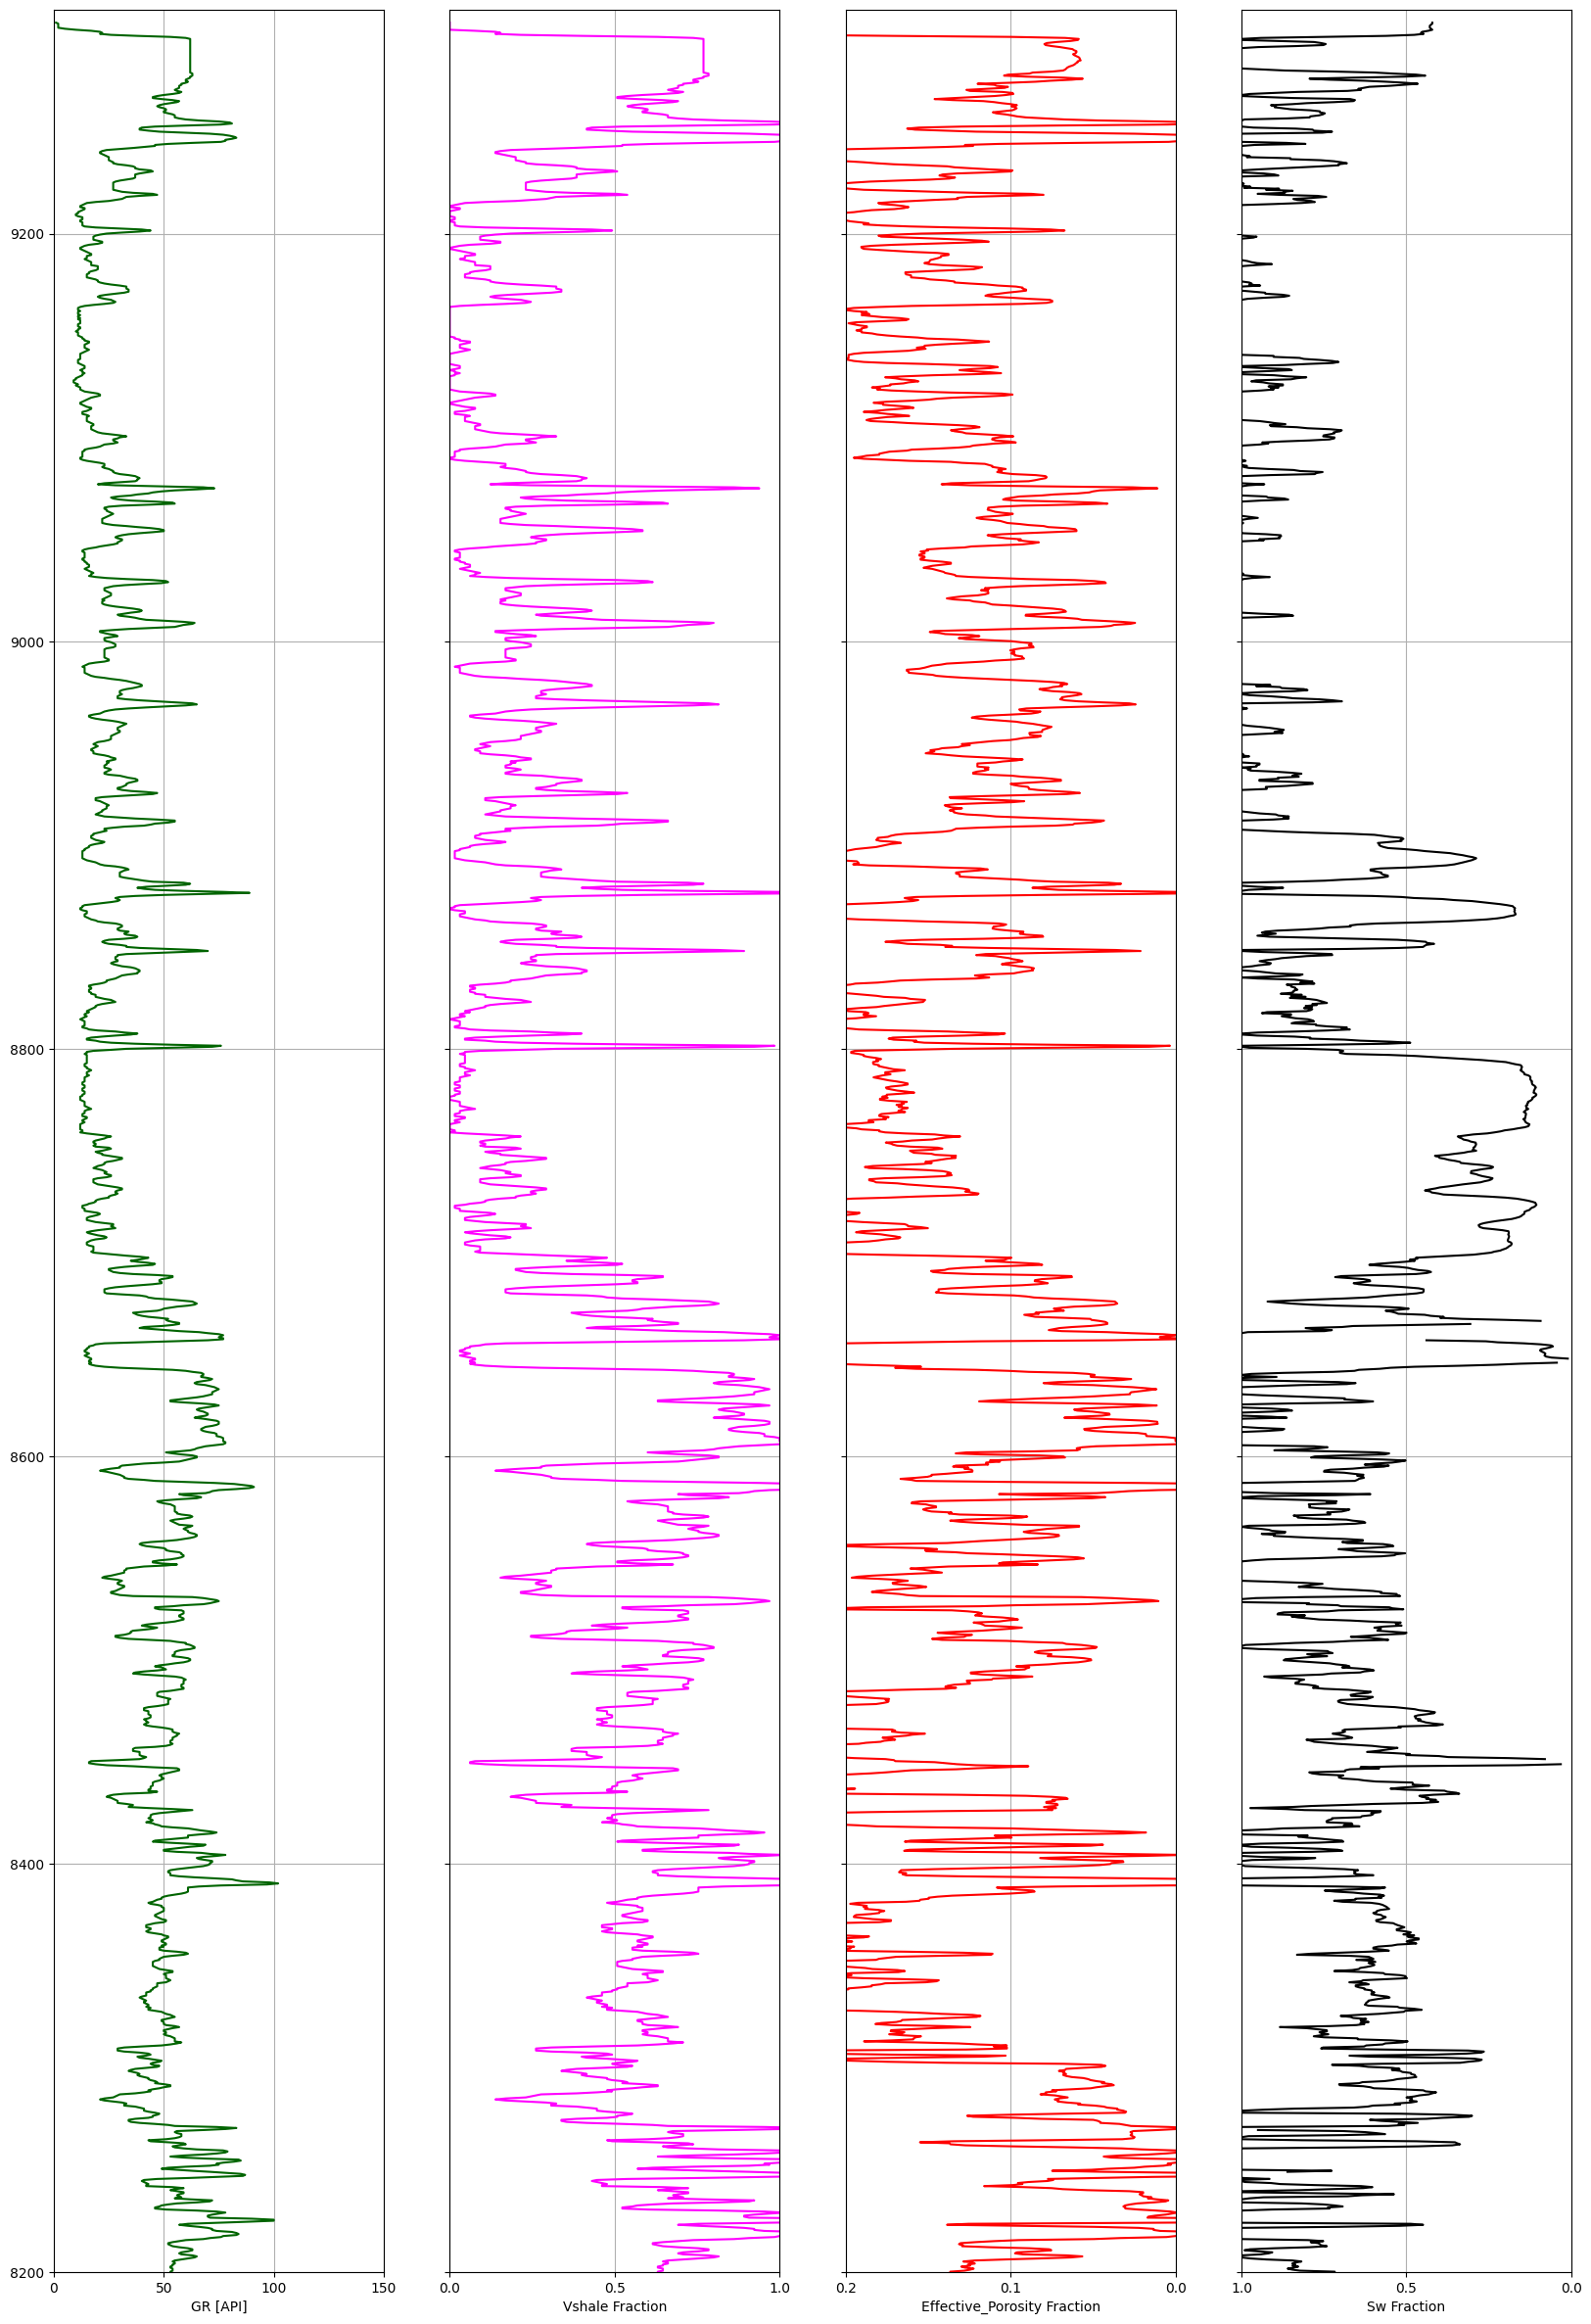

In [39]:
Make_well_logs_plot_results(well)

In [40]:
plt.savefig ('Make_well_logs_plot_results.png', dpi=100, format='png')

<Figure size 640x480 with 0 Axes>

In [41]:
formations_dict= {}

In [42]:
with open('C:\\Users\\formation.csv', 'r') as file:
    next(file) #skip header row
    for row in csv.DictReader(file, fieldnames=['Formation', 'Top', 'Bottom']):
        formations_dict[row['Formation']]=[float(row['Top']), float(row['Bottom'])]

In [43]:
formations_dict


{'zone-1': [8200.0, 8228.0],
 'zone-2': [8228.0, 8312.5],
 'zone-3': [8312.5, 8491.5],
 'zone-4': [8491.5, 8642.5],
 'zone-5': [8642.5, 8700.0],
 'zone-6': [8700.0, 8857.0],
 'zone-7': [8857.0, 9220.0],
 'zone-8': [9220.5, 9310.0]}

In [44]:
formations_dict['zone-3'][0]


8312.5

In [45]:
formation_midpoints = []
for key, value in formations_dict.items():
    formation_midpoints.append(value[0] + (value[1]-value[0])/2)
    
formation_midpoints

[8214.0, 8270.25, 8402.0, 8567.0, 8671.25, 8778.5, 9038.5, 9265.25]

In [46]:
# Select the same number of colors as there are formations
zone_colors = ["red", "blue", "green" ,"yellow" ,"purple","blue" , "green" , "red"]

In [47]:
def makeplot(depth, gamma, res, neut, dens, dtc, formations, topdepth, bottomdepth,
            colors):
    fig, ax = plt.subplots(figsize=(15,10))

    #Set up the plot axes
    ax1 = plt.subplot2grid((1,10), (0,0), rowspan=1, colspan = 3)
    ax2 = plt.subplot2grid((1,10), (0,3), rowspan=1, colspan = 3, sharey = ax1)
    ax3 = plt.subplot2grid((1,10), (0,6), rowspan=1, colspan = 3, sharey = ax1)
    ax4 = ax3.twiny() 
    ax5 = plt.subplot2grid((1,10), (0,9), rowspan=1, colspan = 1, sharey = ax1)

    # As our curve scales will be detached from the top of the track,
    # this code adds the top border back in without dealing with splines
    ax10 = ax1.twiny()
    ax10.xaxis.set_visible(False)
    ax11 = ax2.twiny()
    ax11.xaxis.set_visible(False)
    ax12 = ax3.twiny()
    ax12.xaxis.set_visible(False)

    # Gamma Ray track
    
    ## Setting up the track and curve
    ax1.plot(gamma, depth, color = "green", linewidth = 0.5)
    ax1.set_xlabel("Gamma")
    ax1.xaxis.label.set_color("green")
    ax1.set_xlim(0, 150)
    ax1.set_ylabel("Depth (ft)")
    ax1.tick_params(axis='x', colors="green")
    ax1.spines["top"].set_edgecolor("green")
    ax1.title.set_color('green')
    ax1.set_xticks([0, 50, 100, 150])
    ax1.text(0.05, 1.04, 0, color='green', 
             horizontalalignment='left', transform=ax1.transAxes)
    ax1.text(0.95, 1.04, 150, color='green', 
             horizontalalignment='right', transform=ax1.transAxes)
    ax1.set_xticklabels([])
    
    ## Setting Up Shading for GR
    left_col_value = 0
    right_col_value = 150
    span = abs(left_col_value - right_col_value)
    cmap = plt.get_cmap('hot_r')
    color_index = np.arange(left_col_value, right_col_value, span / 100)
    #loop through each value in the color_index
    for index in sorted(color_index):
        index_value = (index - left_col_value)/span
        color = cmap(index_value) #obtain color for color index value
        ax1.fill_betweenx(depth, gamma , right_col_value, where = gamma >= index,  color = color)
    
    
    
    # Resistivity track
    ax2.plot(res, depth, color = "red", linewidth = 0.5)
    ax2.set_xlabel("ILD")
    ax2.set_xlim(0.2, 2000)
    ax2.xaxis.label.set_color("red")
    ax2.tick_params(axis='x', colors="red")
    ax2.spines["top"].set_edgecolor("red")
    ax2.set_xticks([0.1, 1, 10, 100, 1000])
    ax2.semilogx()
    ax2.text(0.05, 1.04, 0.1, color='red', 
             horizontalalignment='left', transform=ax2.transAxes)
    ax2.text(0.95, 1.04, 1000, color='red', 
             horizontalalignment='right', transform=ax2.transAxes)
    ax2.set_xticklabels([])

    # Density track
    ax3.plot(dens, depth, color = "red", linewidth = 0.5)
    ax3.set_xlabel("RHOB")
    ax3.set_xlim(1.95, 2.95)
    ax3.xaxis.label.set_color("red")
    ax3.tick_params(axis='x', colors="red")
    ax3.spines["top"].set_edgecolor("red")
    ax3.set_xticks([1.95, 2.45, 2.95])
    ax3.text(0.05, 1.04, 1.95, color='red', 
             horizontalalignment='left', transform=ax3.transAxes)
    ax3.text(0.95, 1.04, 2.95, color='red', 
             horizontalalignment='right', transform=ax3.transAxes)
    ax3.set_xticklabels([])


    # Neutron track placed ontop of density track
    ax4.plot(neut, depth, color = "blue", linewidth = 0.5)
    ax4.set_xlabel('NPHI')
    ax4.xaxis.label.set_color("blue")
    ax4.set_xlim(45, -15)
    ax4.tick_params(axis='x', colors="blue")
    ax4.spines["top"].set_position(("axes", 1.08))
    ax4.spines["top"].set_visible(True)
    ax4.spines["top"].set_edgecolor("blue")
    ax4.set_xticks([45,  15, -15])
    ax4.text(0.05, 1.1, 45, color='blue', 
             horizontalalignment='left', transform=ax4.transAxes)
    ax4.text(0.95, 1.1, -15, color='blue', 
              horizontalalignment='right', transform=ax4.transAxes)
    ax4.set_xticklabels([])

    ax5.set_xticklabels([])
    ax5.text(0.5, 1.1, 'Formations', fontweight='bold',
             horizontalalignment='center', transform=ax5.transAxes)
    
    # Adding in neutron density shading
    x1=dens
    x2=neut

    x = np.array(ax3.get_xlim())
    z = np.array(ax4.get_xlim())

    nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

    ax3.fill_betweenx(depth, x1, nz, where=x1>=nz, interpolate=True, color='green')
    ax3.fill_betweenx(depth, x1, nz, where=x1<=nz, interpolate=True, color='yellow')
    
    
    # Common functions for setting up the plot can be extracted into
    # a for loop. This saves repeating code.
    for ax in [ax1, ax2, ax3]:
        ax.set_ylim(bottomdepth, topdepth)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))
    
    for ax in [ax1, ax2, ax3, ax5]:
        # loop through the formations dictionary and zone colors
        for depth, color in zip(formations.values(), colors):
            # use the depths and colors to shade across the subplots
            ax.axhspan(depth[0], depth[1], color=color, alpha=0.1)


    for ax in [ax2, ax3, ax4, ax5]:
        plt.setp(ax.get_yticklabels(), visible = False)
    
    for label, formation_mid in zip(formations_dict.keys(), 
                                    formation_midpoints):
        ax5.text(0.5, formation_mid, label, rotation=90,
                verticalalignment='center', fontweight='bold',
                fontsize='large')

    plt.tight_layout()
    fig.subplots_adjust(wspace = 0)

In [48]:
makeplot(well['DEPTH'], well['GR'], well['RHOB'], well['NPHI'],
        well['ILD'], formations_dict, 8200, 9310 ,  
         zone_colors)

TypeError: makeplot() missing 1 required positional argument: 'colors'

In [ ]:
def xplot(axisx, axisy, axisz):
  plt.scatter(axisx, axisy, c=axisz, s=5, cmap='gist_rainbow')
  plt.colorbar()

In [ ]:
# crossplot RHOB vs NPHI
axisx = well['NPHI']
axisy = well['RHOB']
axisz = well.DEPTH

xplot(axisx, axisy, axisz)
plt.title('Bulk Density vs Neutron Porosity of KTB-1')
plt.xlabel('NPHI (Fraction)'); plt.ylabel('RHOB  (g/cc)')

In [ ]:
"RHOB - NPHI cross matrix template"

def deeplook(denfl):
  lsX = np.linspace(0,0.45,46)

  ssSNP = 0.222*lsX**2 + 1.021*lsX + 0.024
  dolSNP = 0.6*lsX**2 + 0.749*lsX - 0.00434

  ssCNL = 0.222*lsX**2 + 1.021*lsX + 0.039
  dolCNL = 1.40*lsX**2 + 0.389*lsX - 0.01259

  ssSnpX = np.empty((np.size(lsX),0), float)
  dolSnpX = np.empty((np.size(lsX),0), float)
  ssCnlX = np.empty((np.size(lsX),0), float)
  dolCnlX = np.empty((np.size(lsX),0), float)

  for i in np.nditer(lsX):
      ssSnpX = np.append(ssSnpX, np.roots([0.222, 1.021, 0.024 - i])[1])
      dolSnpX = np.append(dolSnpX, np.roots([0.6, 0.749, -0.00434 - i])[1])
      ssCnlX = np.append(ssCnlX, np.roots([0.222, 1.021, 0.039 - i])[1])
      dolCnlX = np.append(dolCnlX, np.roots([1.40, 0.389, -0.01259 - i])[1])

  densma_Ls = 2.71; densma_Ss = 2.65; densma_Dol = 2.87 #densma: density matrix

  denLs = (denfl - densma_Ls) * lsX + densma_Ls
  denSs = (denfl - densma_Ss) * lsX + densma_Ss
  denDol = (denfl - densma_Dol) * lsX + densma_Dol

  %matplotlib inline

  fig, ax = plt.subplots(2, figsize=(14,6))

  ax[0] = plt.subplot(121)
  ax[1] = plt.subplot(122)

  #Setting for first Chart (Neutron Porosity equivalent curves)
  ax[0].set_title("Similar with Chart Por-13a")
  ax[0].set_xlabel("Apparent Limestone Porosity [v.v]")
  ax[0].set_ylabel("True Porosity [v.v]")
  ax[0].set_xlim(-0.05,0.40)
  ax[0].set_ylim(0,0.40)

  ax[0].plot(ssSnpX, lsX, '-', color='blue', label = 'Sandstone-SNP')
  ax[0].plot(ssCnlX, lsX, '--', color='blue', label = 'Sandstone-CNL')
  ax[0].plot(lsX, lsX, '-', color='black', label = 'Limestone')
  ax[0].plot(dolSnpX, lsX, '-', color='red', label = 'Dolomite-SNP')
  ax[0].plot(dolCnlX, lsX, '--', color='red', label = 'Dolomite-CNL')
  ax[0].legend(loc='best')
  ax[0].grid(True)

  #Settings for second chart (Neutron Density)
  ax[1].set_title("ND Crossplot - Chart Por-1e")
  ax[1].set_xlabel("Neutron Porosity [v.v]")
  ax[1].set_ylabel("Density g/cc")
  ax[1].set_xlim(-0.05,0.45)
  ax[1].set_ylim(3,1.9)
  ax[1].plot(ssCnlX, denSs, '.-', color='blue', label = 'Sandstone')
  ax[1].plot(lsX, denLs, '.-', color='black', label = 'Limestone')
  ax[1].plot(dolCnlX, denDol, '.-', color='red', label = 'Dolomite')
  ax[1].legend(loc='best')
  ax[1].grid(True)

In [ ]:
deeplook(1)


In [ ]:
lsX = np.linspace(0,0.45,46)


In [ ]:
ssSNP = 0.222*lsX**2 + 1.021*lsX + 0.024
dolSNP = 0.6*lsX**2 + 0.749*lsX - 0.00434

In [ ]:
ssCNL = 0.222*lsX**2 + 1.021*lsX + 0.039
dolCNL = 1.40*lsX**2 + 0.389*lsX - 0.01259

In [ ]:
ssSnpX = np.empty((np.size(lsX),0), float)
dolSnpX = np.empty((np.size(lsX),0), float)
ssCnlX = np.empty((np.size(lsX),0), float)
dolCnlX = np.empty((np.size(lsX),0), float)

for i in np.nditer(lsX):
    ssSnpX = np.append(ssSnpX, np.roots([0.222, 1.021, 0.024 - i])[1])
    dolSnpX = np.append(dolSnpX, np.roots([0.6, 0.749, -0.00434 - i])[1])
    ssCnlX = np.append(ssCnlX, np.roots([0.222, 1.021, 0.039 - i])[1])
    dolCnlX = np.append(dolCnlX, np.roots([1.40, 0.389, -0.01259 - i])[1])

In [ ]:
denLs = (1 - 2.71) * lsX + 2.71
denSs = (1 - 2.65) * lsX + 2.65  
denDol = (1 - 2.87) * lsX + 2.87

In [ ]:
%matplotlib inline

fig, ax = plt.subplots(2, figsize=(14,6))

ax[0] = plt.subplot(121)
ax[1] = plt.subplot(122)

#Setting for first Chart (Neutron Porosity equivalent curves)
ax[0].set_title("Similar with Chart Por-13a")
ax[0].set_xlabel("Apparent Limestone Porosity [v.v]")
ax[0].set_ylabel("True Porosity [v.v]")
ax[0].set_xlim(-0.05,0.40)
ax[0].set_ylim(0,0.40)

ax[0].plot(ssSnpX, lsX, '-', color='blue', label = 'Sandstone-SNP')
ax[0].plot(ssCnlX, lsX, '--', color='blue', label = 'Sandstone-CNL')
ax[0].plot(lsX, lsX, '-', color='black', label = 'Limestone')
ax[0].plot(dolSnpX, lsX, '-', color='red', label = 'Dolomite-SNP')
ax[0].plot(dolCnlX, lsX, '--', color='red', label = 'Dolomite-CNL')
ax[0].legend(loc='best')
ax[0].grid(True)

#Settings for second chart (Neutron Density)
ax[1].set_title("ND Crossplot - Chart Por-1e")
ax[1].set_xlabel("Neutron Porosity [v.v]")
ax[1].set_ylabel("Density g/cc")
ax[1].set_xlim(-0.05,0.45)
ax[1].set_ylim(3,1.9)
ax[1].plot(ssCnlX, denSs, '.-', color='blue', label = 'Sandstone')
ax[1].plot(lsX, denLs, '.-', color='black', label = 'Limestone')
ax[1].plot(dolCnlX, denDol, '.-', color='red', label = 'Dolomite')
ax[1].legend(loc='best')
ax[1].grid(True)

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan = 1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
ax6 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan = 1)
ax7 = ax6.twiny()
ax8 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1)

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (ft)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150])

# Resistivity track
ax2.plot("ILD", "DEPTH", data = well, color = "red")
ax2.set_xlabel("Resistivity")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot("RHOB", "DEPTH", data = well, color = "red")
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonic track
ax4.plot("DT", "DEPTH", data = well, color = "purple")
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax5.plot("NPHI", "DEPTH", data = well, color = "blue")
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.45, -0.15)
ax5.set_ylim(4150, 3500)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.45,  0.15, -0.15])

# Porosity track
ax6.plot("Porosity_Gaymard", "DEPTH", data = well, color = "black")
ax6.set_xlabel("Total PHI")
ax6.set_xlim(0.5, 0)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.set_xticks([0, 0.25, 0.5])

# Porosity track
ax7.plot("Effective_Porosity", "DEPTH", data = well, color = "blue")
ax7.set_xlabel("Effective PHI")
ax7.set_xlim(0.5, 0)
ax7.xaxis.label.set_color("blue")
ax7.tick_params(axis='x', colors="blue")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.spines["top"].set_edgecolor("blue")
ax7.set_xticks([0, 0.25, 0.5])

# Sw track
ax8.plot("Sw", "DEPTH", data = well, color = "black")
ax8.set_xlabel("SW - Archie")
ax8.set_xlim(0, 1)
ax8.xaxis.label.set_color("black")
ax8.tick_params(axis='x', colors="black")
ax8.spines["top"].set_edgecolor("black")
ax8.set_xticks([0, 0.5, 1])

# Sw track
ax9.plot("Sw", "DEPTH", data = well, color = "blue")
ax9.set_xlabel("SW - Simandoux")
ax9.set_xlim(0, 1)
ax9.xaxis.label.set_color("blue")
ax9.tick_params(axis='x', colors="blue")
ax9.spines["top"].set_edgecolor("blue")
ax9.set_xticks([0, 0.5, 1])

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4, ax6, ax8, ax9]:
    ax.set_ylim(9310, 8200)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
plt.tight_layout()


In [ ]:
#reservoir zone

fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan = 1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
ax6 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan = 1)
ax7 = ax6.twiny()
ax8 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1)

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (ft)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150])

# Resistivity track
ax2.plot("ILD", "DEPTH", data = well, color = "red")
ax2.set_xlabel("Resistivity")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot("RHOB", "DEPTH", data = well, color = "red")
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonic track
ax4.plot("DT", "DEPTH", data = well, color = "purple")
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax5.plot("NPHI", "DEPTH", data = well, color = "blue")
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.45, -0.15)
ax5.set_ylim(4150, 3500)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.45,  0.15, -0.15])

# Porosity track
ax6.plot("Porosity_Gaymard", "DEPTH", data = well, color = "black")
ax6.set_xlabel("Total PHI")
ax6.set_xlim(0.5, 0)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.set_xticks([0, 0.25, 0.5])

# Porosity track
ax7.plot("Effective_Porosity", "DEPTH", data = well, color = "blue")
ax7.set_xlabel("Effective PHI")
ax7.set_xlim(0.5, 0)
ax7.xaxis.label.set_color("blue")
ax7.tick_params(axis='x', colors="blue")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.spines["top"].set_edgecolor("blue")
ax7.set_xticks([0, 0.25, 0.5])

# Sw track
ax8.plot("Sw", "DEPTH", data = well, color = "black")
ax8.set_xlabel("SW - Archie")
ax8.set_xlim(0, 1)
ax8.xaxis.label.set_color("black")
ax8.tick_params(axis='x', colors="black")
ax8.spines["top"].set_edgecolor("black")
ax8.set_xticks([0, 0.5, 1])

# Sw track
ax9.plot("Sw", "DEPTH", data = well, color = "blue")
ax9.set_xlabel("SW - Simandoux")
ax9.set_xlim(0, 1)
ax9.xaxis.label.set_color("blue")
ax9.tick_params(axis='x', colors="blue")
ax9.spines["top"].set_edgecolor("blue")
ax9.set_xticks([0, 0.5, 1])

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax4, ax6, ax8, ax9]:
    ax.set_ylim(8857, 8642.5)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    
    
plt.tight_layout()


In [ ]:
well.describe()

In [ ]:
well.mean()

In [ ]:
well.describe()

In [ ]:
well

In [ ]:
well.columns

In [ ]:
well[['VSH','Porosity_Density']]

In [ ]:
well.iloc[887:1316]

In [ ]:
well.iloc[887:1002]
well.describe()

In [ ]:
well.VSH.mean()

In [ ]:
well.Effective_Porosity.mean()

In [ ]:
well.Sw.mean()

In [ ]:
well.iloc[1000:1317]


In [ ]:

well.VSH.mean()

In [ ]:
well['VSH'].iloc[1000:1317].mean()

In [ ]:
well['Effective_Porosity'].iloc[1000:1317].mean()

In [ ]:
well['Sw'].iloc[1000:1317].mean()

In [ ]:
well['VSH'].iloc[888:1000].mean()

In [ ]:
well['Effective_Porosity'].iloc[888:1000].mean()

In [ ]:
well['Sw'].iloc[888:1000].mean()